In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd
import umap
from sklearn.preprocessing import StandardScaler
import HomeMade as hm

In [2]:
N = 1e5

all_features = "v0_ks_mass v0_ks_massErr pv0_x pv0_y pv0_z a0xy a0 a0z cosTheta v0_chi2 \
v0_x v0_y v0_z v0_rxy v0_rxyErr v0_px v0_py v0_pz v0_pt v0_p \
v0_ptErr \
v0_px1 v0_py1 v0_pz1 v0_pt1 \
v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 alpha calpha epsilon1 \
epsilon2 Alpha pL1 pL2 pT thetastar rapidity_ks pseudorapidity".split(" ")

path = "data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
file = uproot.open(path)
mc = file['tree'].pandas.df(all_features + ['trueKs'], entrystop = N)

mc = mc.loc[(mc.v0_ks_mass > 400) & (mc.v0_ks_mass < 600)].reset_index(drop=True)

In [3]:
features = all_features[2:]

In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(mc[features])

In [5]:
mapscaled = umap.UMAP()
embscaled = mapscaled.fit_transform(scaled)

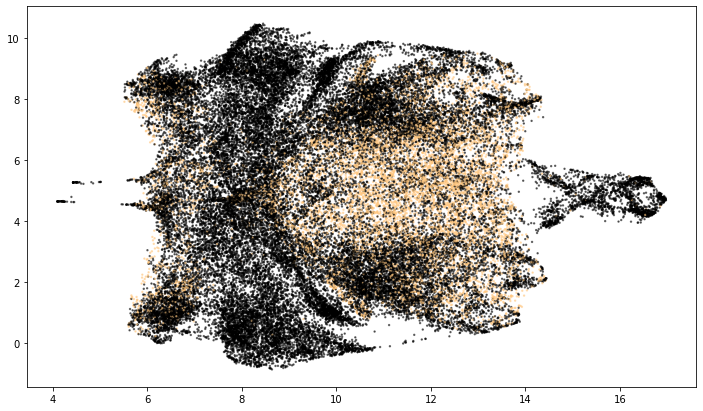

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(embscaled[:,0],embscaled[:,1],s=2,alpha=0.5,cmap='copper',c=mc.trueKs)

In [40]:
yumap = umap.UMAP()
emb = yumap.fit_transform(mc[features])

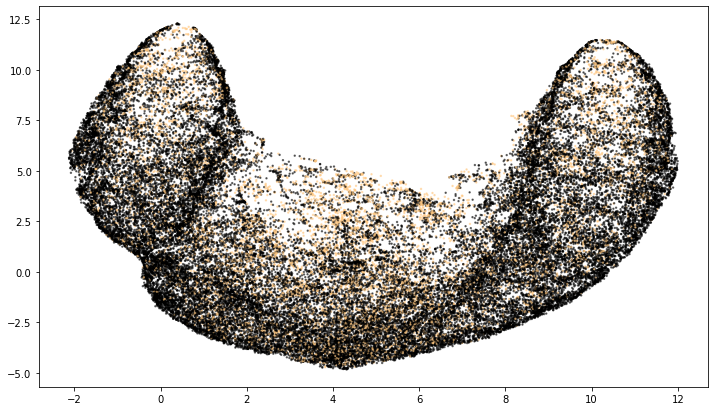

In [41]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(emb[:,0],emb[:,1],s=2,alpha=0.5,cmap='copper',c=mc.trueKs)

Supervised:

In [42]:
mapscaled = umap.UMAP()
embscaled = mapscaled.fit_transform(scaled,y=mc.trueKs)

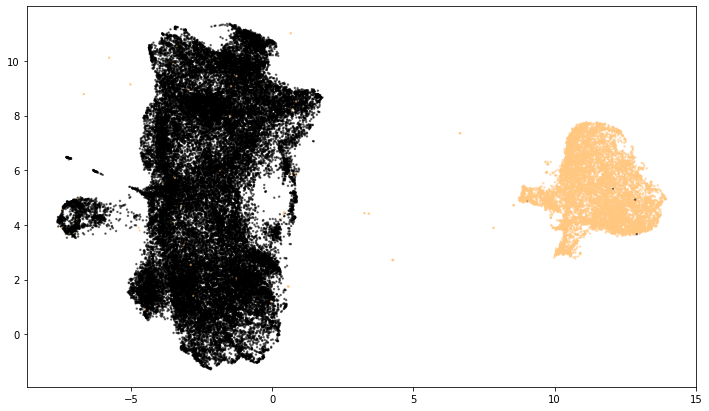

In [43]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(embscaled[:,0],embscaled[:,1],s=2,alpha=0.5,cmap='copper',c=mc.trueKs)

In [44]:
yumap = umap.UMAP()
emb = yumap.fit_transform(mc[features],y=mc.trueKs)

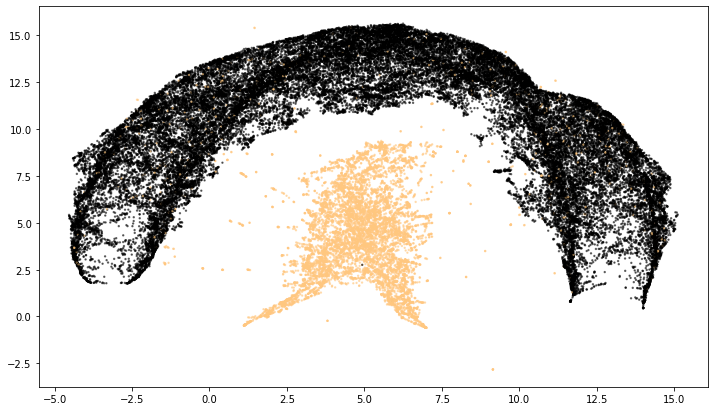

In [45]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(emb[:,0],emb[:,1],s=2,alpha=0.5,cmap='copper',c=mc.trueKs)

How close are mc and data to eachother in parameter space:
(They seem to pretty much lie ontop of eachother, look below)

In [8]:
path = "data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
file = uproot.open(path)
data = file['tree'].pandas.df(all_features, entrystop = N)

path = "data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
file = uproot.open(path)
mc = file['tree'].pandas.df(all_features + ['trueKs'], entrystop = N)

data = data.loc[(data.v0_ks_mass > 400) & (data.v0_ks_mass < 600)]

mc = mc.loc[(mc.v0_ks_mass > 400) & (mc.v0_ks_mass < 600)]

In [50]:
emb_all = umap.UMAP().fit_transform(pd.concat([data,mc])[features])

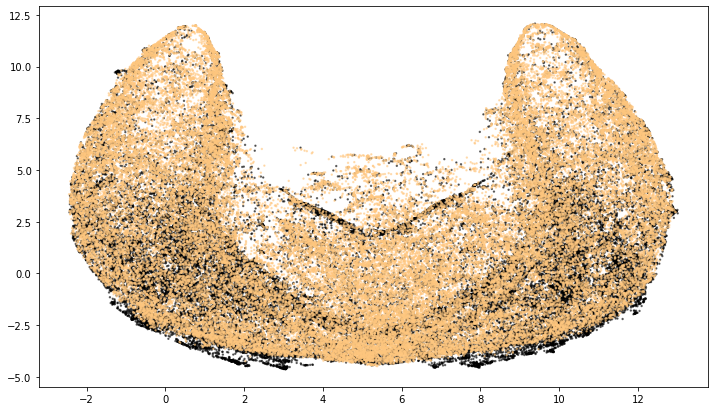

In [51]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(emb_all[:,0],emb_all[:,1],s=2,alpha=0.5,cmap='copper',c=np.append(np.zeros(len(data)),np.ones(len(mc))))

Perhaps we can train a supervised umap on MC and use it to seperate data:

In [9]:
yumap = umap.UMAP()
yumap.fit(mc[features],y=mc.trueKs)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [53]:
emb = yumap.transform(data[features])

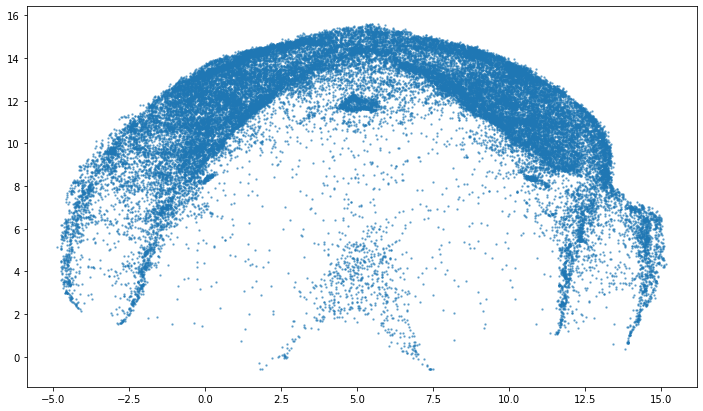

In [54]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(emb[:,0],emb[:,1],s=2,alpha=0.5)

Perhaps scaling is nessecary:

In [10]:
scaler = StandardScaler()
scaled_mc = scaler.fit_transform(mc[features])

In [68]:
yumap = umap.UMAP(n_components=1)
yumap.fit(scaled_mc,y=mc.trueKs)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=1, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [15]:
path = "data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
file = uproot.open(path)
data = file['tree'].pandas.df(all_features, entrystop = 1e6) #was run with 1e7
data = data.loc[(data.v0_ks_mass > 400) & (data.v0_ks_mass < 600)]

In [69]:
emb = yumap.transform(scaler.transform(data[features]))

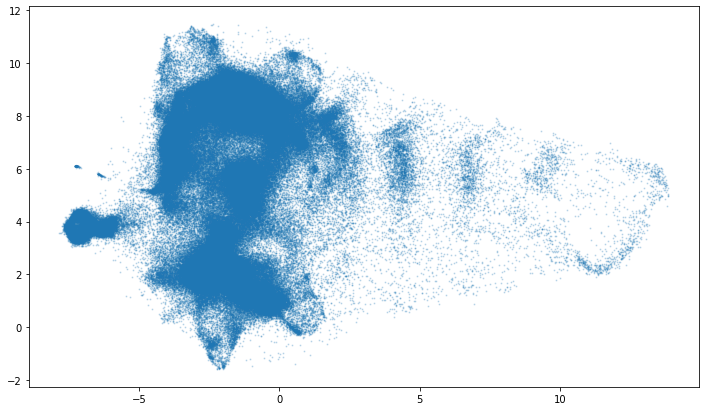

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(emb[:,0],emb[:,1],s=1,alpha=0.2)

Loading Johanns Function:

In [124]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# For final fits
from iminuit import Minuit
from AppStatFunctions import Chi2Regression

# For primary guess fit
from scipy.optimize import curve_fit
from scipy.stats import norm, chi2

# Roc-curve related
from sklearn.metrics import auc

def double_gauss_fit(mass, bins = 100, range = (400, 600), ax = None, verbose = True, guesses = None, max_size = None, plimit = 0, color = "red"):
    # Fit third degree polynomium to background
    def background_fit(x, a, b, c, d):
        res = a * (x- 498) ** 3 + b * (x-498) ** 2 + c * (x-498) + d
        return res
    
    # The double gauss signal
    def add_signal(x, mean, sig, size, ratio, sig_ratio):
        return size * binwidth *  (ratio * norm.pdf(x, mean, sig) + \
                                   (1 - ratio) * norm.pdf(x, mean, sig_ratio * sig))
    
    # The full fit
    def full_fit(x, mean, sig, size, ratio, sig_ratio, a, b, c, d):
        return background_fit(x, a, b, c, d) + add_signal(x, mean, sig, size, ratio, sig_ratio)
    
    
    # Make histogram
    vals, edges = np.histogram(mass, bins = bins, range = range)
    xs = (edges[1:] + edges[:-1])/2

    binwidth = xs[1] - xs[0]

    mask = vals > 0
    vals = vals[mask]  
    xs = xs[mask]
    errs = np.sqrt(vals)

    # Get guesses for a background fit
    if not guesses:
        back_data_mask = abs(xs - xs[np.argmax(vals)]) > 10
        background_guess =  [0, 0, (vals[-1]- vals[0]) / 100, vals.min()]

        if len(vals[back_data_mask]) == 0:
            return None, None, None, None

        try: 
            vals_b, cov_b = curve_fit(background_fit, xs[back_data_mask], vals[back_data_mask], p0 = background_guess)
        except:
            vals_b = background_guess
        b1, b2, b3, b4 = vals_b
        
        bkgr_chi2 = Chi2Regression(background_fit, xs[back_data_mask], vals[back_data_mask], errs[back_data_mask])
        bkgr_min  = Minuit(bkgr_chi2, pedantic = False, a = b1, b = b2, c = b3, d = b4)
        bkgr_min.migrad()
        counter = 0
        while not bkgr_min.valid and counter<50:
            bkgr_min.migrad()
            counter += 1
        if not bkgr_min.valid: print("No background valid minimum found!")
        
        #Save guesses 
        b1, b2, b3, b4 = bkgr_min.args

        guesses_sig = [498, 7, 2000, 0.5, 2]
        try:
            vals_f, cov_f = curve_fit(full_fit, xs, vals, p0 = guesses_sig + [b1, b2, b3, b4])
        except:
            vals_f = np.hstack([guesses_sig, vals_b])

        s1, s2, s3, s4, s5, b1, b2, b3, b4 = vals_f
    else:
        s1, s2, s3, s4, s5, b1, b2, b3, b4 = guesses

    full_chi2 = Chi2Regression(full_fit, xs, vals, errs)
    full_min  = Minuit(full_chi2, pedantic = False, a = b1, b = b2, c = b3, d = b4, \
                       mean = s1, sig = s2, size = s3, ratio = s4, sig_ratio = s5, limit_sig_ratio = (1, 4), \
                       limit_ratio = (0, 1.0), limit_mean = (490, 510), limit_size = (0, max_size), limit_sig = (3, 10))
    full_min.migrad()
    
    full_min.migrad()
    counter = 0
    while not full_min.valid and counter<200:
        full_min.migrad()
        counter += 1
    if not full_min.valid: print("No valid minimum found!")

    # Check fit
    chi = full_min.fval 
    pval = chi2.sf(chi, np.sum(mask) - len(full_min.args))

    if verbose:
        print(f"Completed fit with Chi2: {chi:.1f}, p-val: {pval:.3f} and the total amount of signal " + \
            f"{full_min.values['size']:.0f} +/- {full_min.errors['size']:.0f}, background: {len(mass) - int(full_min.values['size'])}")


    if ax:
        ax.plot(xs, vals, alpha = 1, color = color)
#         ax.errorbar(xs, vals, errs, elinewidth = 1, color = 'k', capsize = 2, linestyle = 'none', alpha = 0.25)
#         ax.plot(xs, full_fit(xs, *full_min.args), '--', alpha = 0.5)

    if True:#full_min.errors['size'] < full_min.values['size'] and full_min.valid and pval > plimit:
        return full_min.values['size'], len(mass) - full_min.values['size'], full_min.errors['size'], full_min.args
    else:
        return None, None, None, None


def roc_curve_data(mass, probs, Npoints = 10, bins = 100, range = (400, 600), ax_roc = None , ax_fits = None, verbose = True, plimit = 0.01, ax_hist = None):
    sigs, bkgrs, errs = [], [], []
    mass = np.array(mass)
    mass = mass[np.argsort(probs)]
    cuts = (len(mass) / Npoints * np.arange(0, Npoints)).astype(int)
    args = None
    max_size = None
    from matplotlib.cm import winter
    colors = winter(np.linspace(0, 1, Npoints)[::-1])
    from scipy.special import logit
    lprobs = np.sort(probs)#np.sort(logit(probs))
    if ax_hist:
        n, edges, patches = ax_hist.hist(lprobs, bins = bins, histtype = 'stepfilled', color = 'gray')
#         print(n)
        for cut, color in zip(cuts, colors):
            ax_hist.vlines(lprobs[cut], 0, max(n), color = color, linestyle = "dashed", alpha = 0.5)
            
    for i, c in zip(cuts, colors):
        bkgr, sig, err, args = double_gauss_fit(mass[i:], bins = bins, range = range, ax = ax_fits, verbose = verbose, guesses = args, max_size = max_size, plimit = plimit, color = c)
        if bkgr:
            bkgrs.append(bkgr)
            sigs.append(sig)
            errs.append(err)
            if len(sigs) == 1:
                max_size = 1 * args[2]

    sigs, bkgrs, errs = np.array(sigs), np.array(bkgrs), np.array(errs)
    y = sigs/sigs.max()
    x = bkgrs/bkgrs.max()

#     x = np.append(x, 0)[::-1]
#     y = np.append(y, 0)[::-1]

    AUC_estimate = np.trapz(np.append(x, 0), np.append(y, 0))

#     x_errs = np.sqrt((errs/sigs.max()) ** 2 + (errs[sigs.argmax()] * sigs / sigs.max() ** 2) ** 2)
#     y_errs = np.sqrt((errs/bkgrs.max()) ** 2 + (errs[bkgrs.argmax()] * bkgrs / bkgrs.max() ** 2) ** 2)
    
    if ax_roc:
        ax_roc.scatter(x, y, c = colors)
#         ax_roc.errorbar(x[:-1], y[:-1], x_errs, y_errs, elinewidth = 1, capsize = 2, color = 'k', ls = 'none')
        ax_roc.set(xlim = (-0.2, 1.2), ylim = (-0.2, 1.2))
        ax_roc.vlines([0,1],0,1,ls='--',color='gray',zorder=-1)
        ax_roc.hlines([0,1],0,1,ls='--',color='gray',zorder=-1)
        
    return AUC_estimate, cuts


Completed fit with Chi2: 92.8, p-val: 0.427 and the total amount of signal 19349 +/- 369, background: 390273
Completed fit with Chi2: 90.1, p-val: 0.507 and the total amount of signal 14835 +/- 185, background: 374306
Completed fit with Chi2: 86.9, p-val: 0.601 and the total amount of signal 13788 +/- 189, background: 354872
Completed fit with Chi2: 85.7, p-val: 0.638 and the total amount of signal 12343 +/- 182, background: 335836
Completed fit with Chi2: 82.6, p-val: 0.724 and the total amount of signal 11264 +/- 265, background: 316435
Completed fit with Chi2: 81.4, p-val: 0.755 and the total amount of signal 10296 +/- 23, background: 296921
Completed fit with Chi2: 87.9, p-val: 0.571 and the total amount of signal 10005 +/- 409, background: 276731
Completed fit with Chi2: 85.3, p-val: 0.649 and the total amount of signal 9148 +/- 347, background: 257107
Completed fit with Chi2: 87.6, p-val: 0.582 and the total amount of signal 8462 +/- 306, background: 237312
Completed fit with Chi

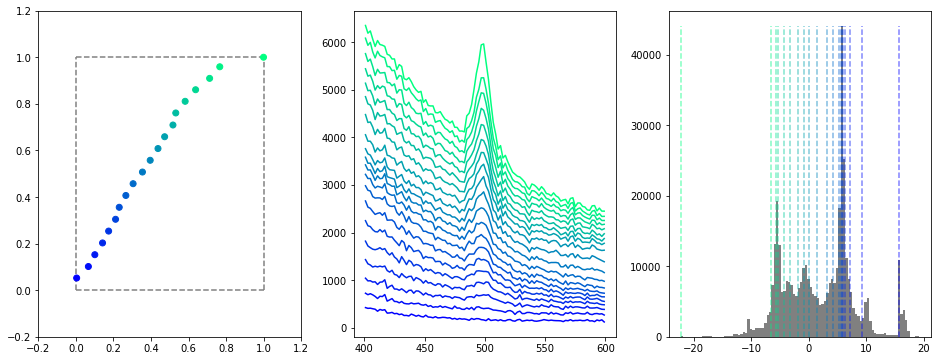

In [71]:
fig, ax = plt.subplots(ncols=3,figsize=(16,6))
c = roc_curve_data(data.v0_ks_mass,-emb[:,0],Npoints=20,ax_roc=ax[0],ax_fits=ax[1],ax_hist=ax[2])
# ax[2].scatter(-emb[:,0],emb[:,1],s=1,alpha=0.1,c='grey')

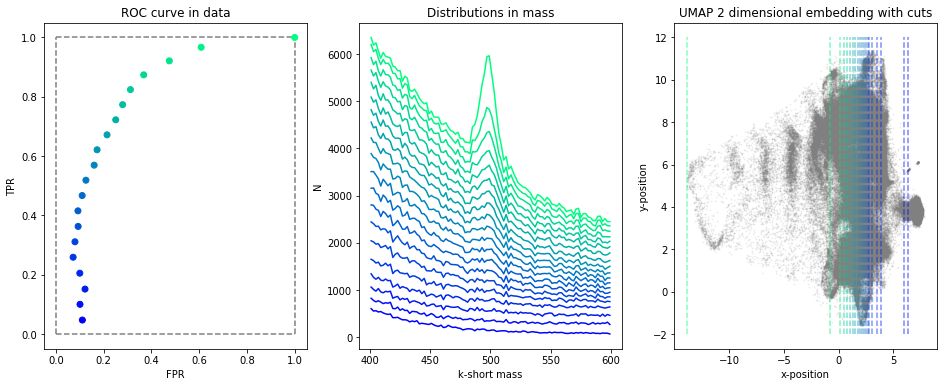

In [66]:
ax[0].set(title='ROC curve in data',
         xlabel='FPR',ylabel='TPR',
         xlim=(-0.05,1.05),ylim=(-0.05,1.05))
ax[1].set(title='Distributions in mass',
         xlabel='k-short mass',ylabel='N')
ax[2].set(title='UMAP 2 dimensional embedding with cuts',
         xlabel='x-position',ylabel='y-position')
fig

In [67]:
# fig.savefig('roc_data_supervised_UMAP.pdf')

In [97]:
yumap = umap.UMAP(n_components=len(features))
yumap.fit_transform(scaled_mc,y=mc.trueKs)
emb = yumap.transform(scaler.transform(data[features]))

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
p = pca.fit_transform(emb)

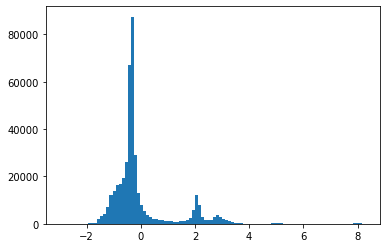

In [126]:
fig, ax = plt.subplots()
# ax.scatter(p[:,0],p[:,2])
ax.hist(p[:,1],bins=100);
# ax.plot(pca.explained_variance_,'b.')

Completed fit with Chi2: 92.8, p-val: 0.427 and the total amount of signal 19349 +/- 369, background: 390273
Completed fit with Chi2: 88.2, p-val: 0.562 and the total amount of signal 12118 +/- 194, background: 377023
Completed fit with Chi2: 90.4, p-val: 0.498 and the total amount of signal 10608 +/- 214, background: 358052
Completed fit with Chi2: 95.0, p-val: 0.366 and the total amount of signal 9130 +/- 1, background: 339050


C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1741: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1742: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


Completed fit with Chi2: 81.7, p-val: 0.747 and the total amount of signal 8309 +/- 268, background: 319390
Completed fit with Chi2: 79.8, p-val: 0.792 and the total amount of signal 7327 +/- 164, background: 299891
Completed fit with Chi2: 77.2, p-val: 0.848 and the total amount of signal 6611 +/- 317, background: 280125
Completed fit with Chi2: 73.7, p-val: 0.908 and the total amount of signal 5956 +/- 195, background: 260299
Completed fit with Chi2: 76.4, p-val: 0.863 and the total amount of signal 5435 +/- 199, background: 240339
Completed fit with Chi2: 73.1, p-val: 0.915 and the total amount of signal 4857 +/- 151, background: 220437
Completed fit with Chi2: 72.4, p-val: 0.925 and the total amount of signal 4399 +/- 112, background: 200412
Completed fit with Chi2: 60.3, p-val: 0.995 and the total amount of signal 4044 +/- 97, background: 180287
Completed fit with Chi2: 60.6, p-val: 0.994 and the total amount of signal 3645 +/- 183, background: 160204
Completed fit with Chi2: 63.0

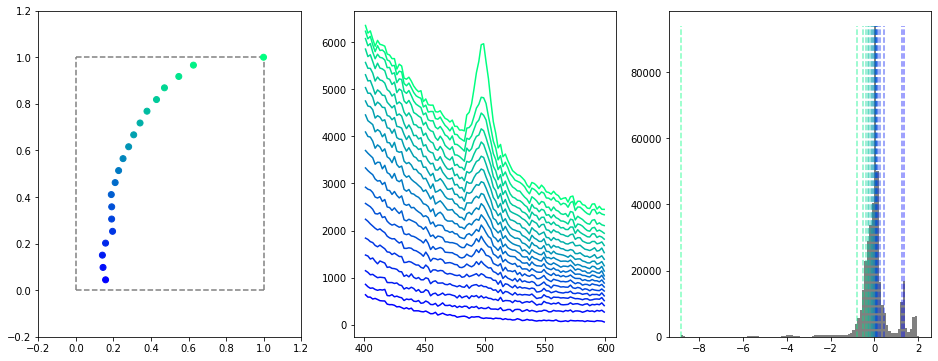

In [128]:
fig, ax = plt.subplots(ncols=3,figsize=(16,6))
c = roc_curve_data(data.v0_ks_mass,-p[:,2],Npoints=20,ax_roc=ax[0],ax_fits=ax[1],ax_hist=ax[2])

Perhaps the rightmost blob is trueKs(!), try to use the x-coordinat as prediction for which we can draw a ROC curve:
(mass is not used in umap)

No values, skipping..
No valid minimum found!
No background valid minimum found!
No valid minimum found!


C:\Users\jv97\Desktop\github\PUK\HomeMade.py:322: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,7),ncols=2)


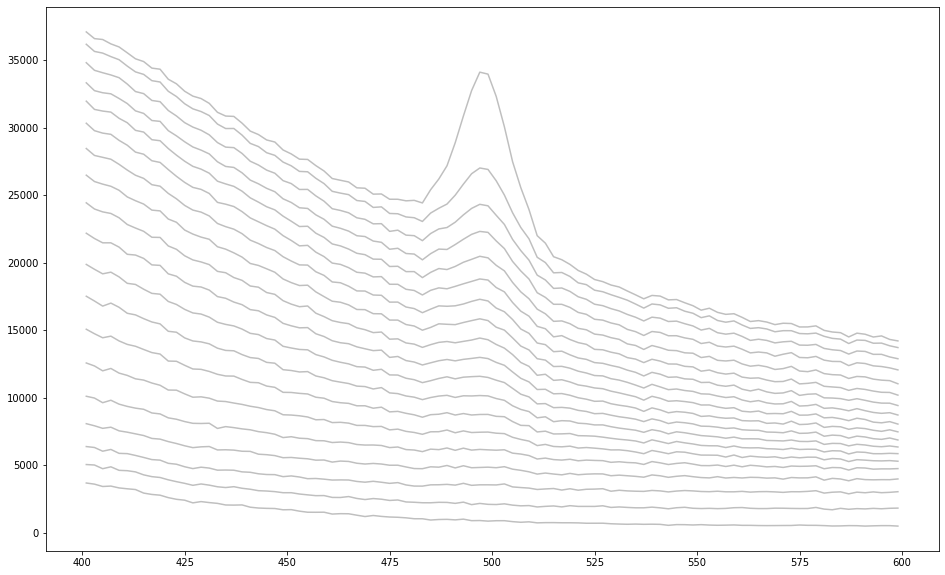

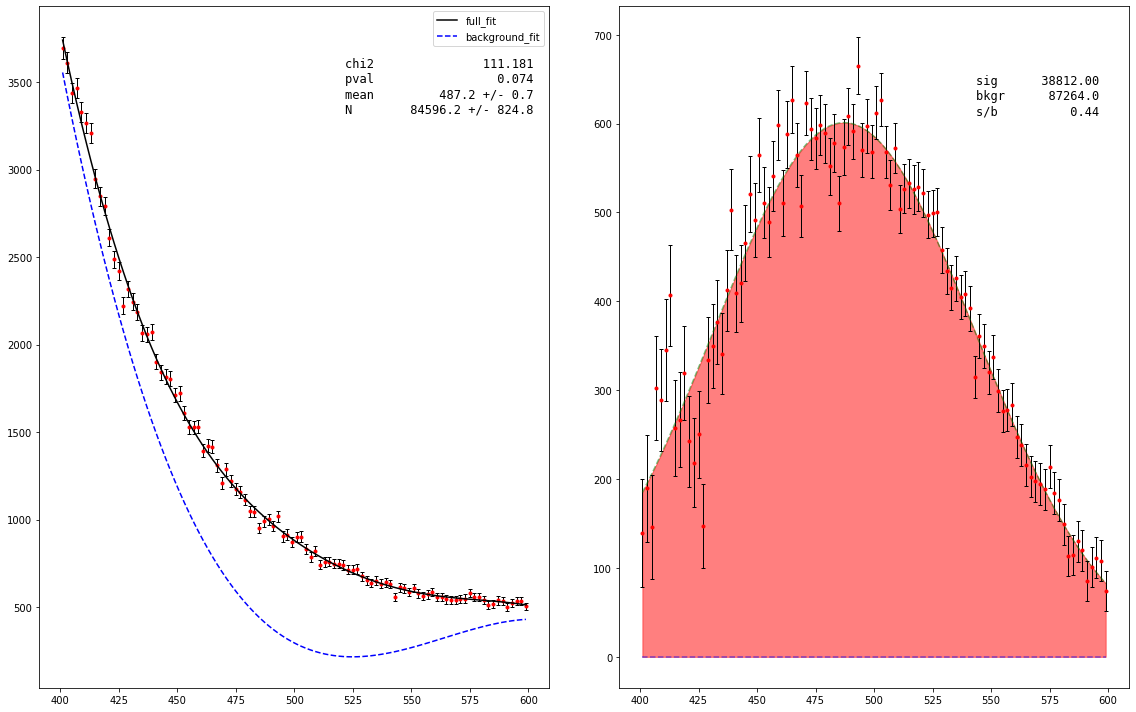

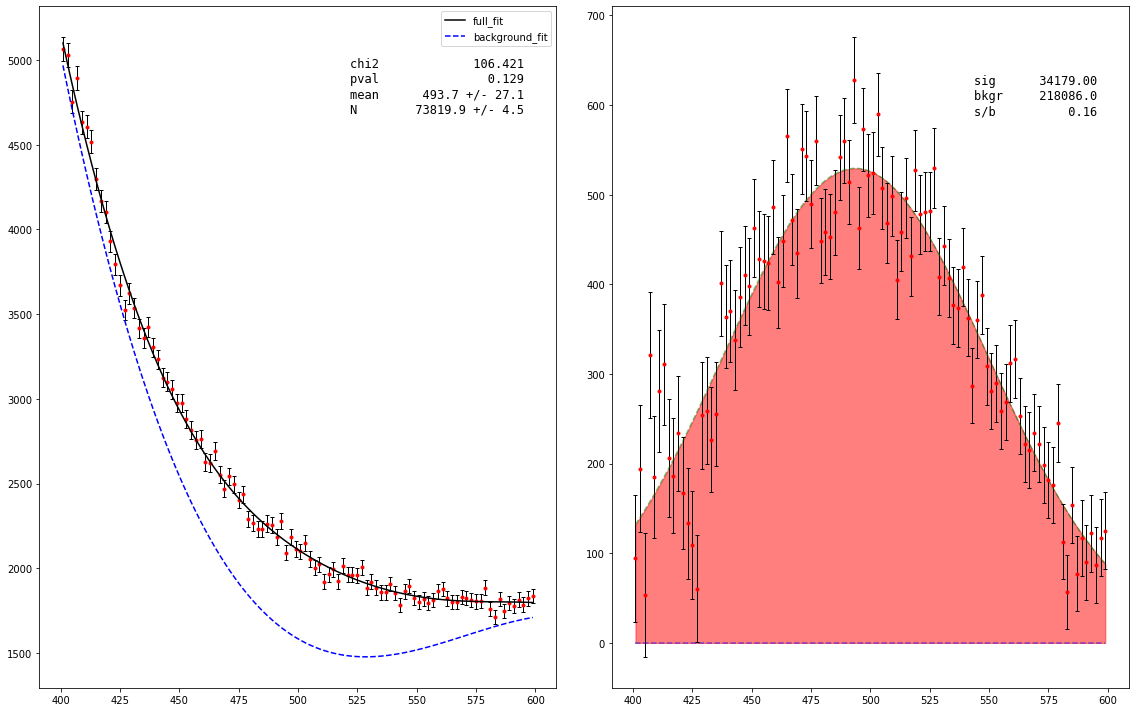

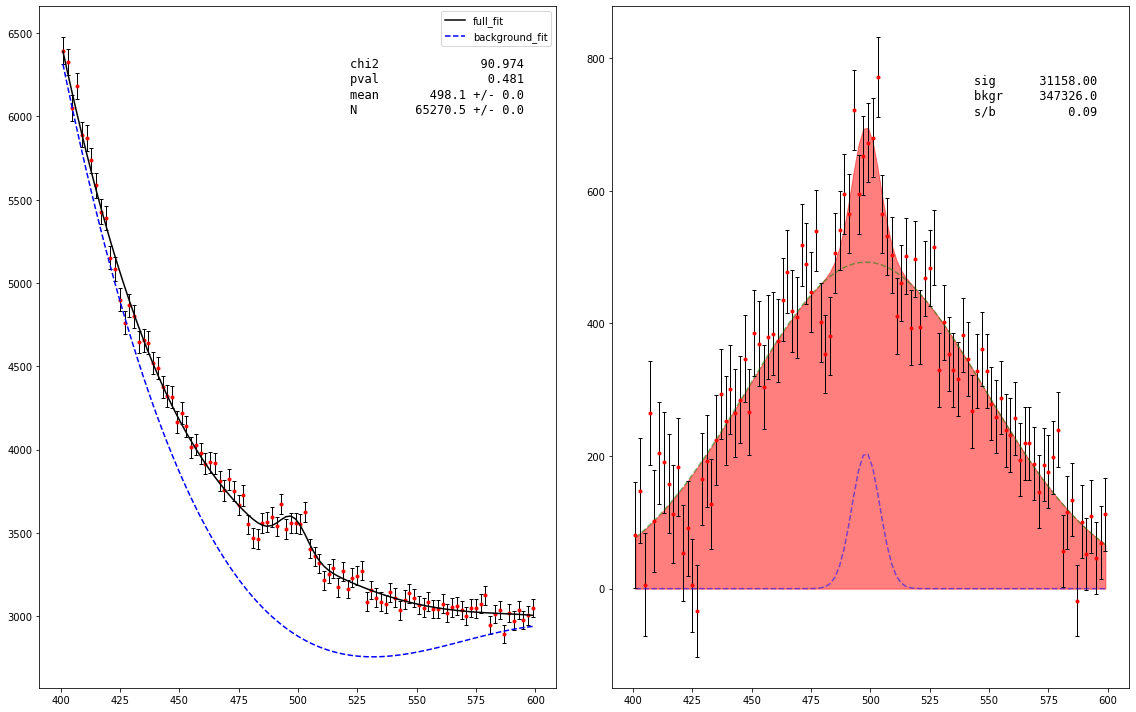

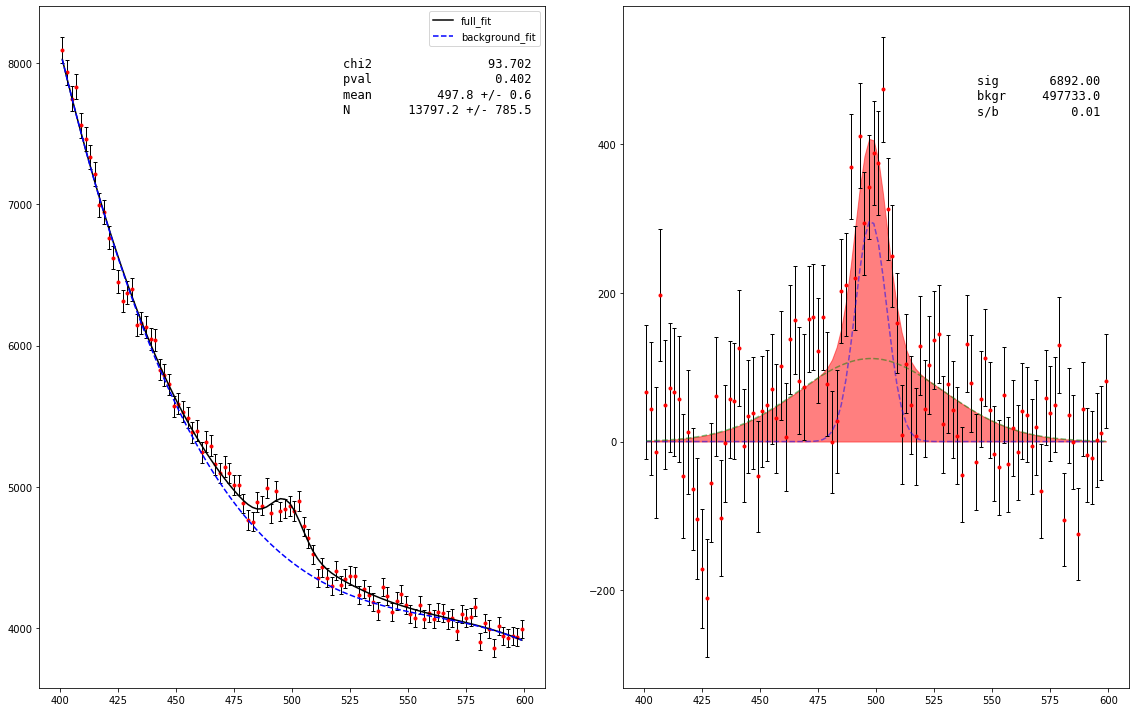

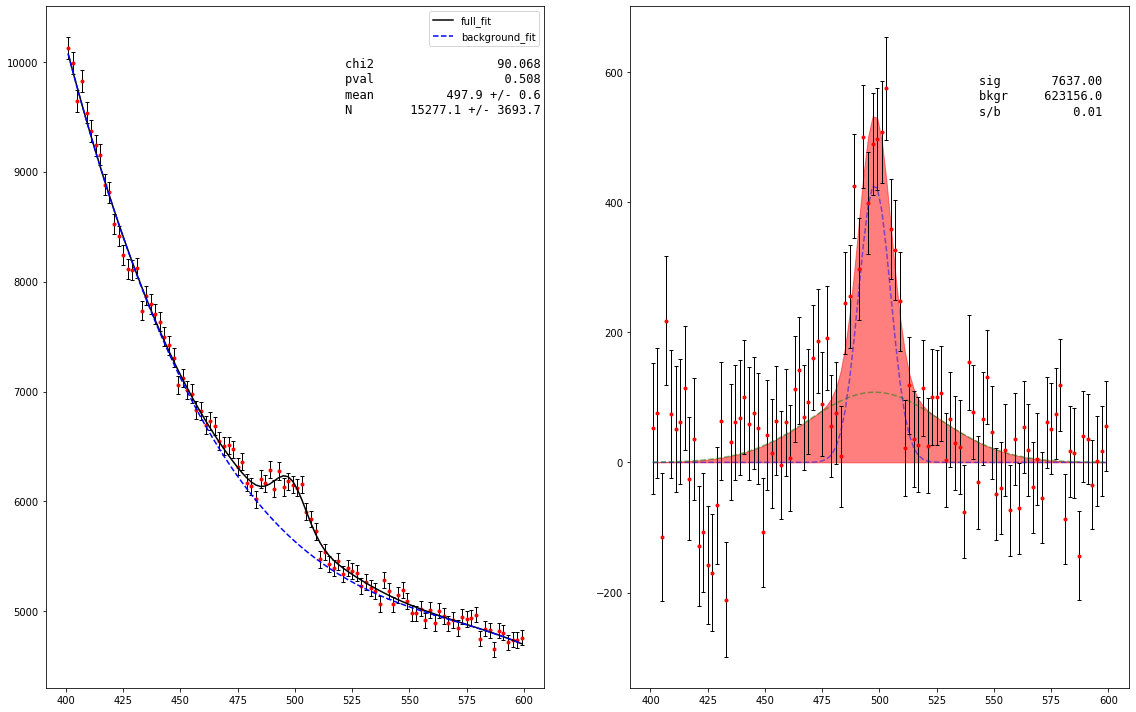

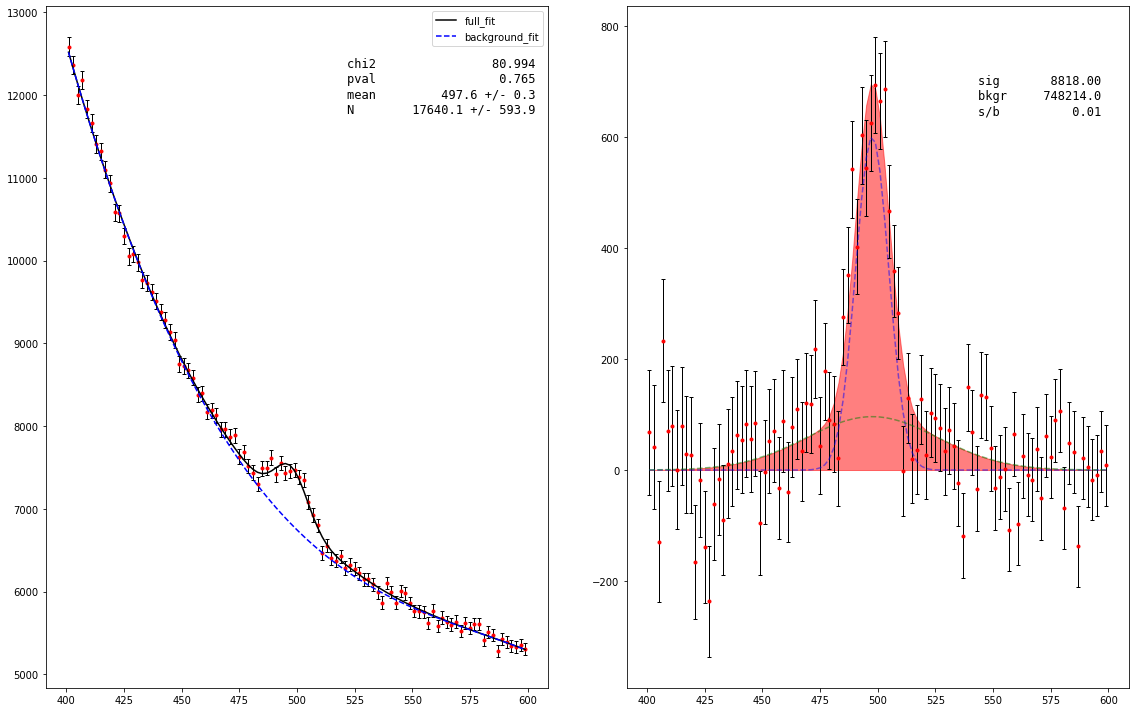

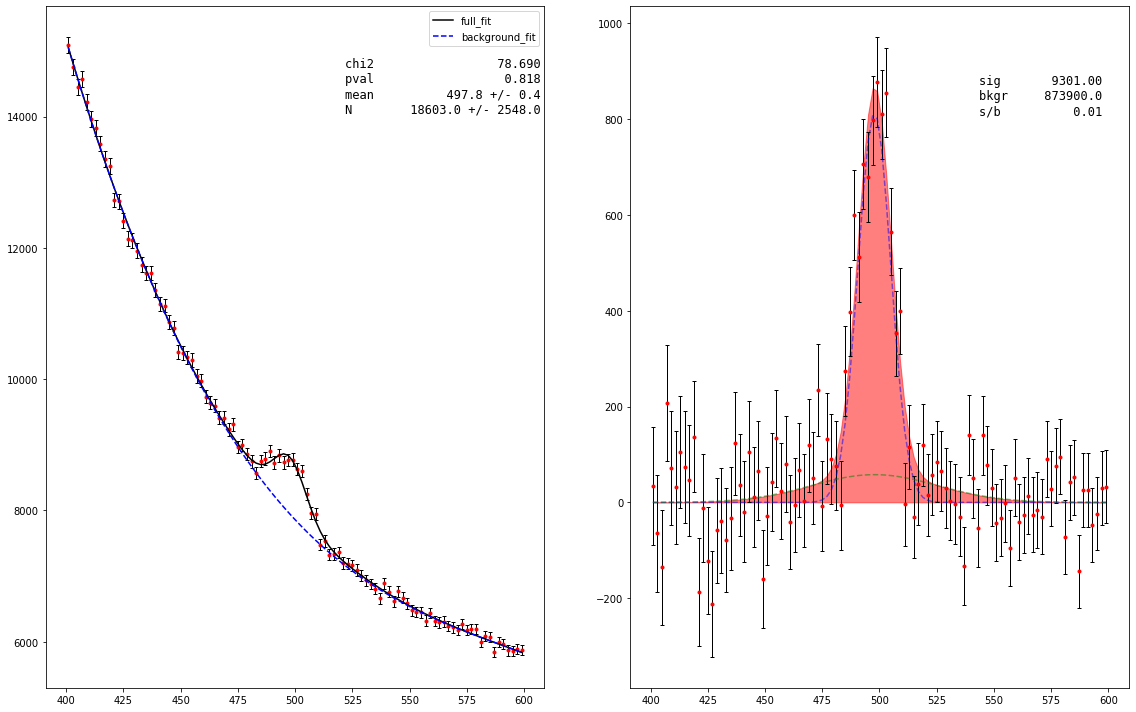

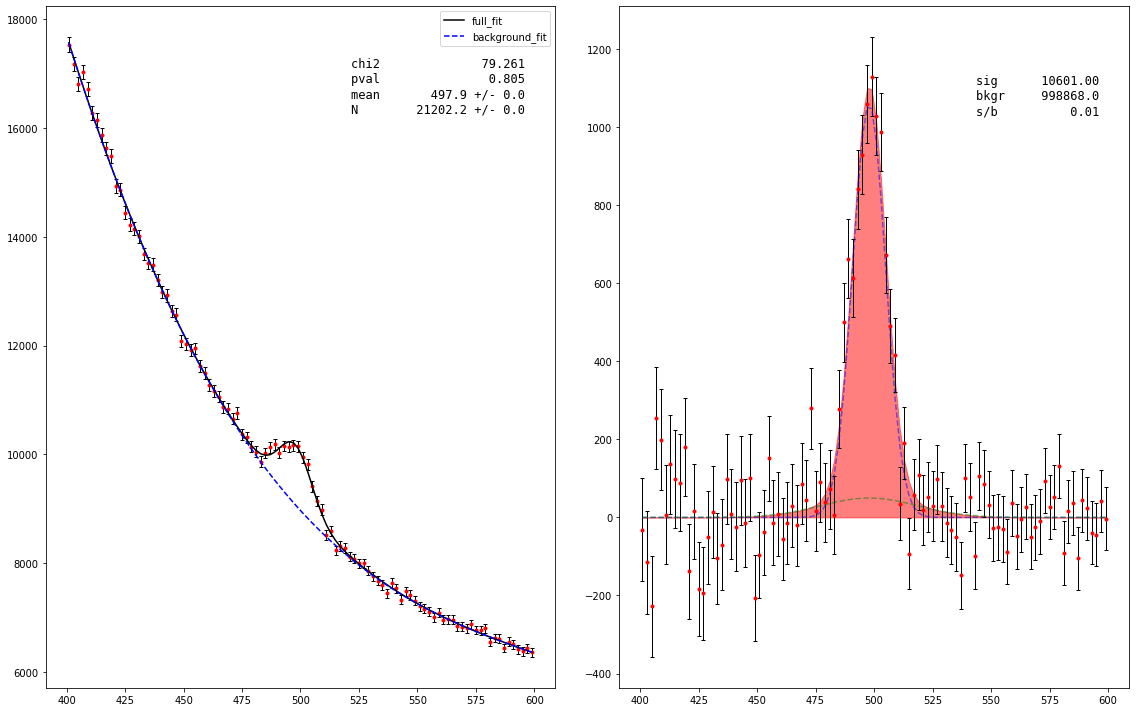

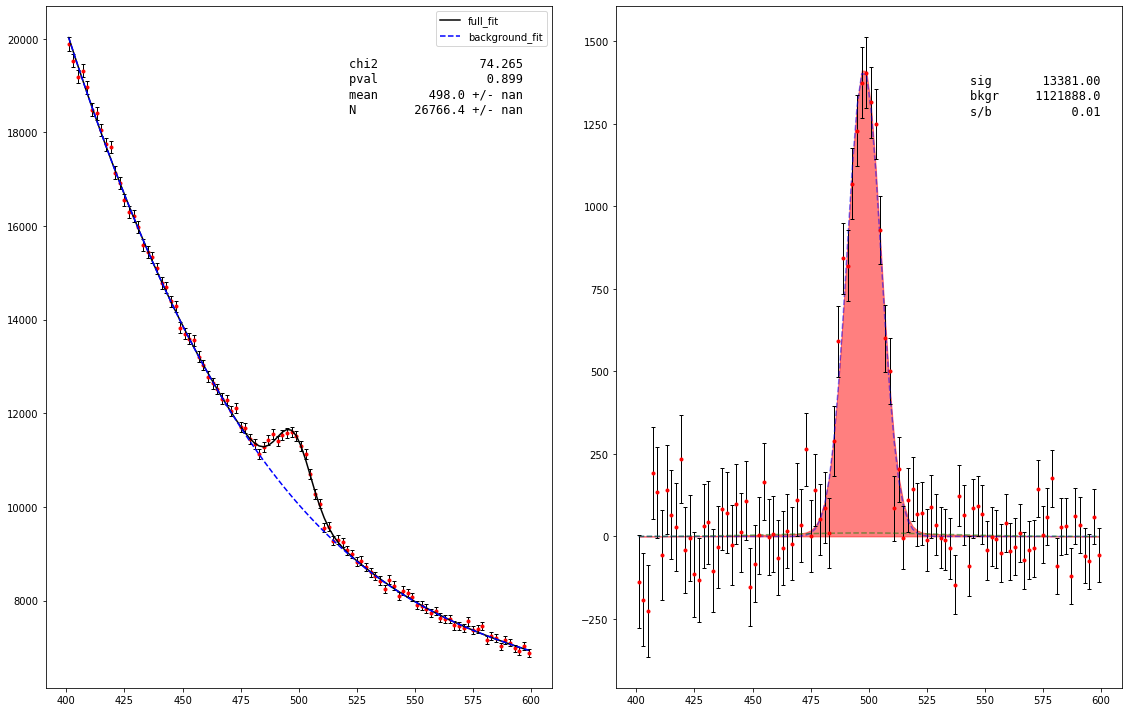

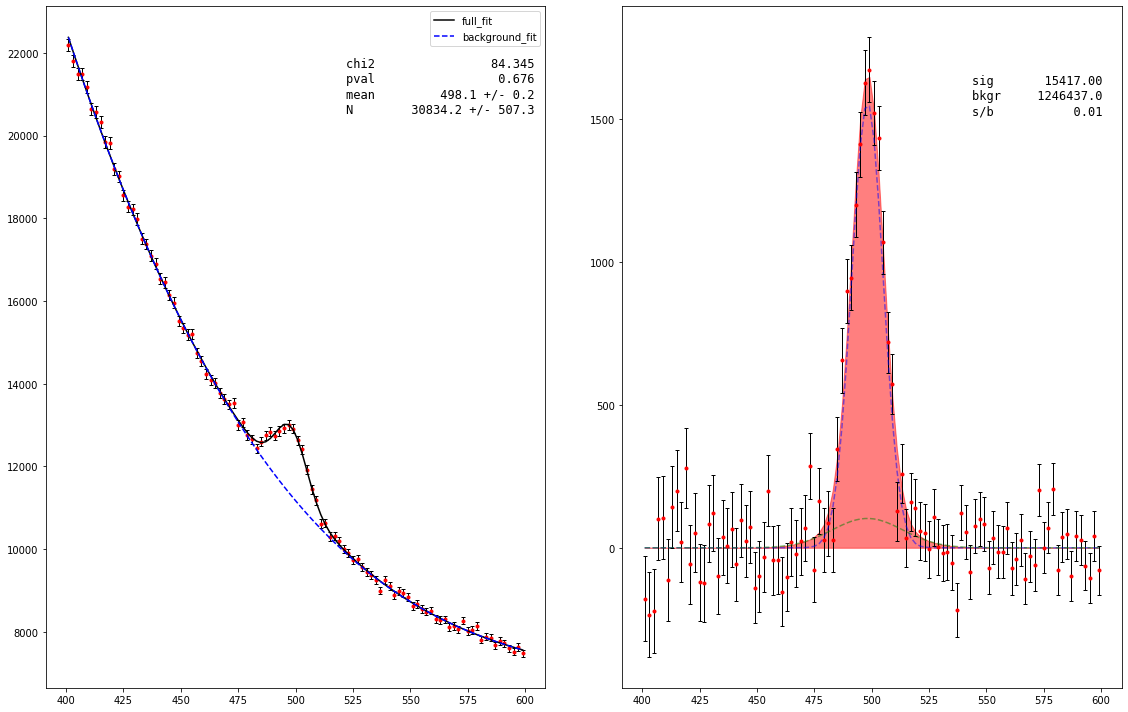

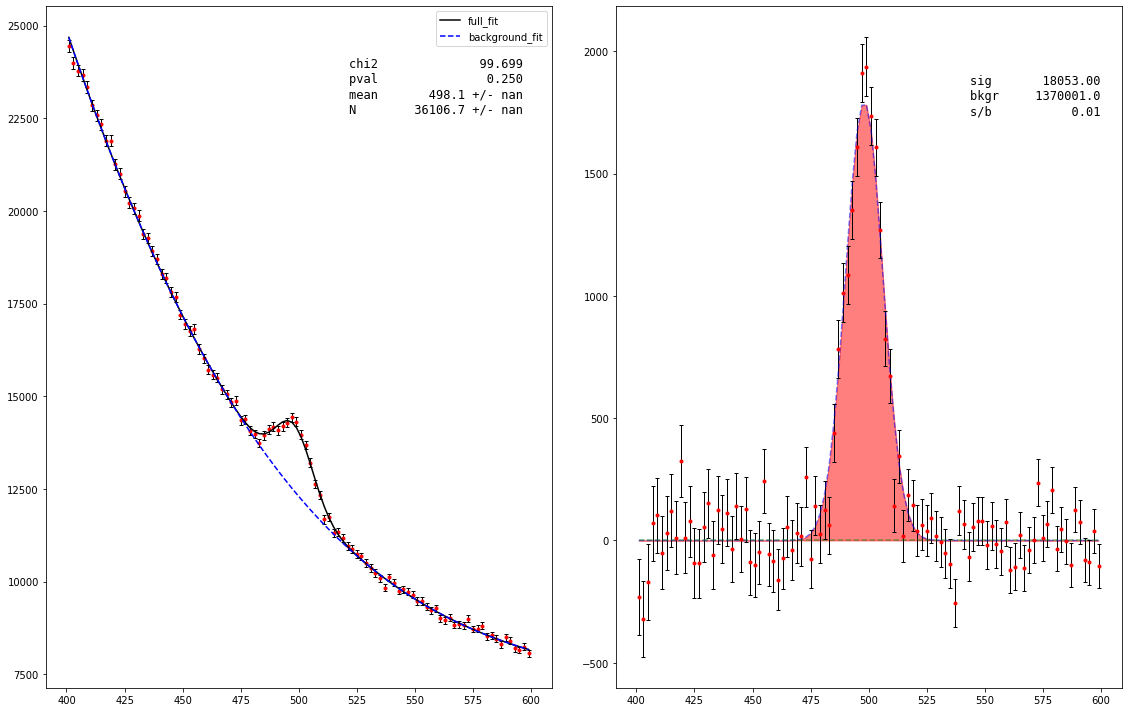

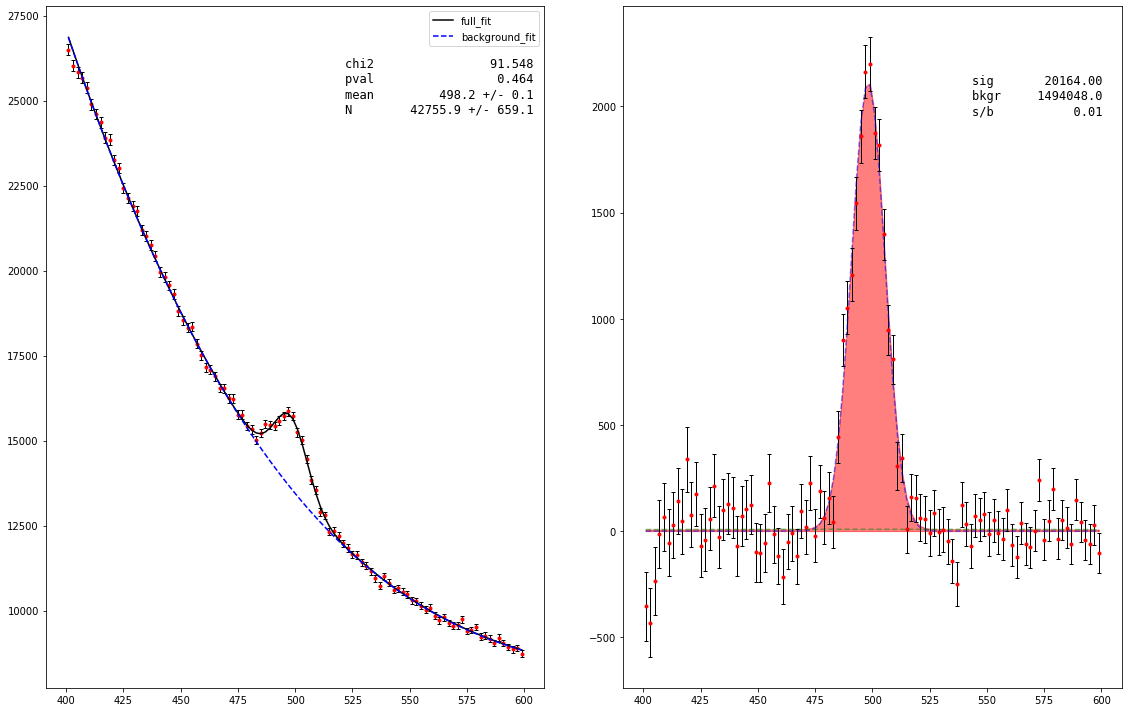

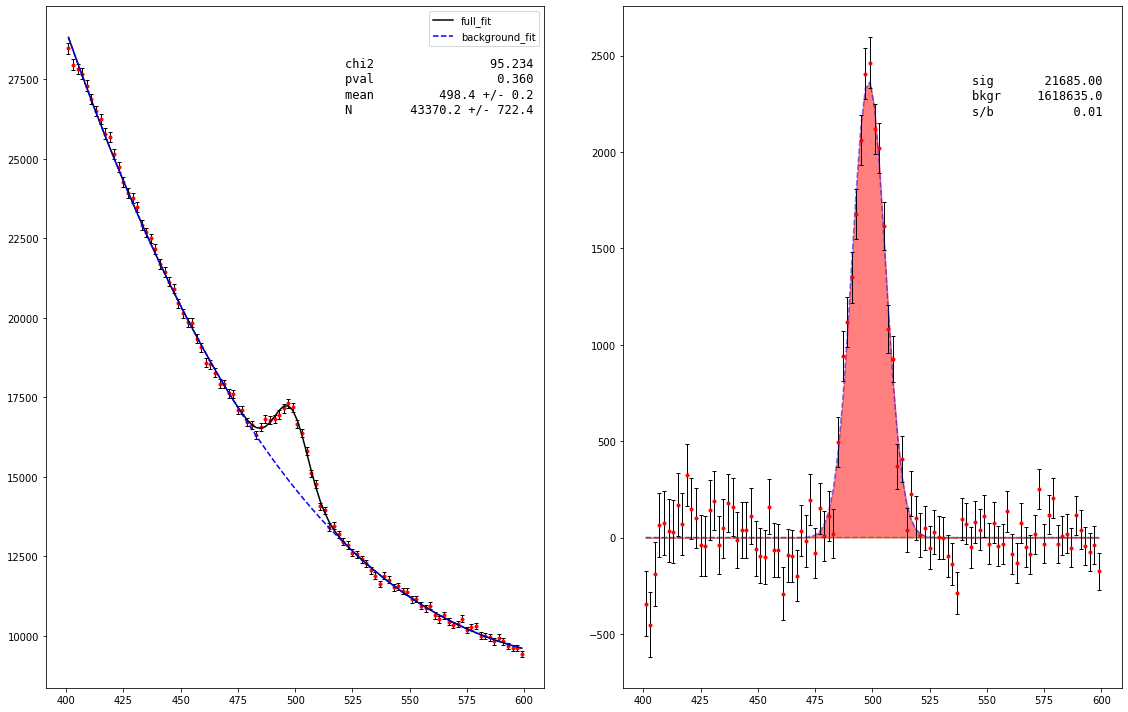

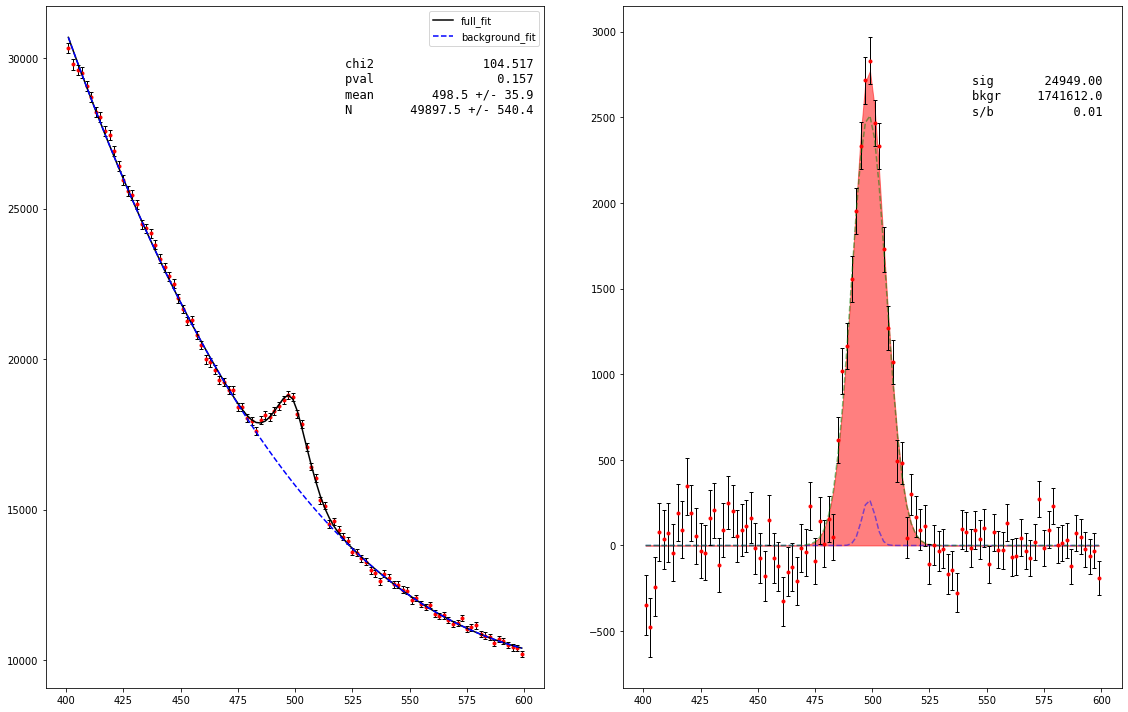

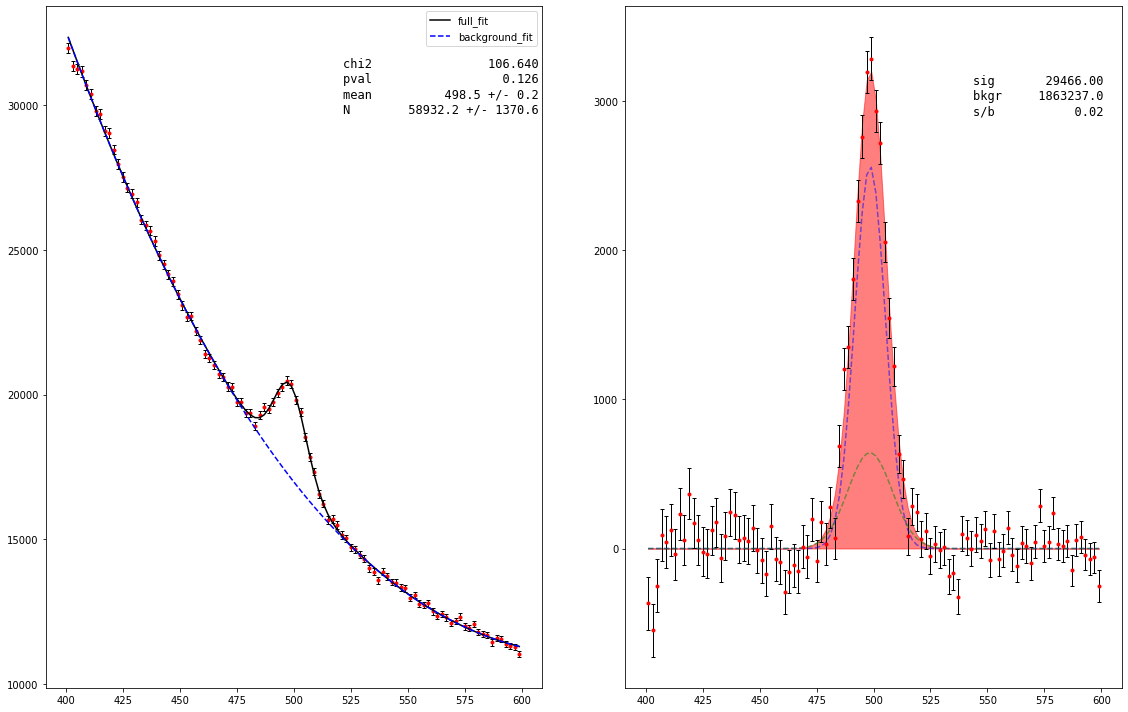

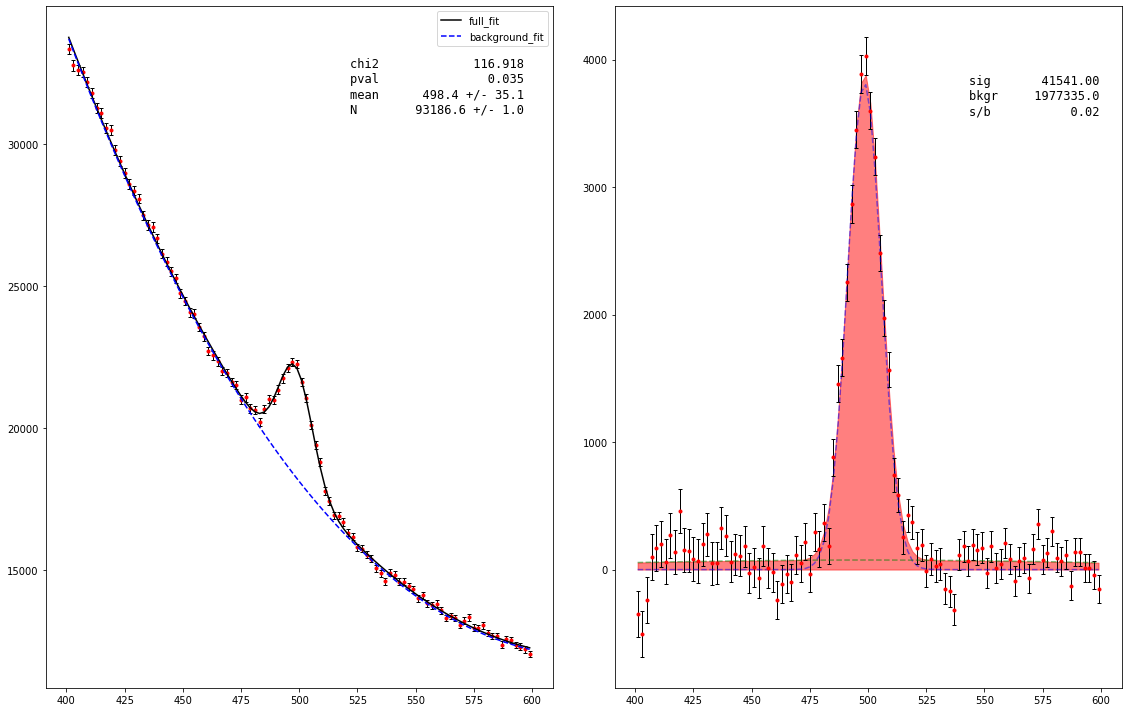

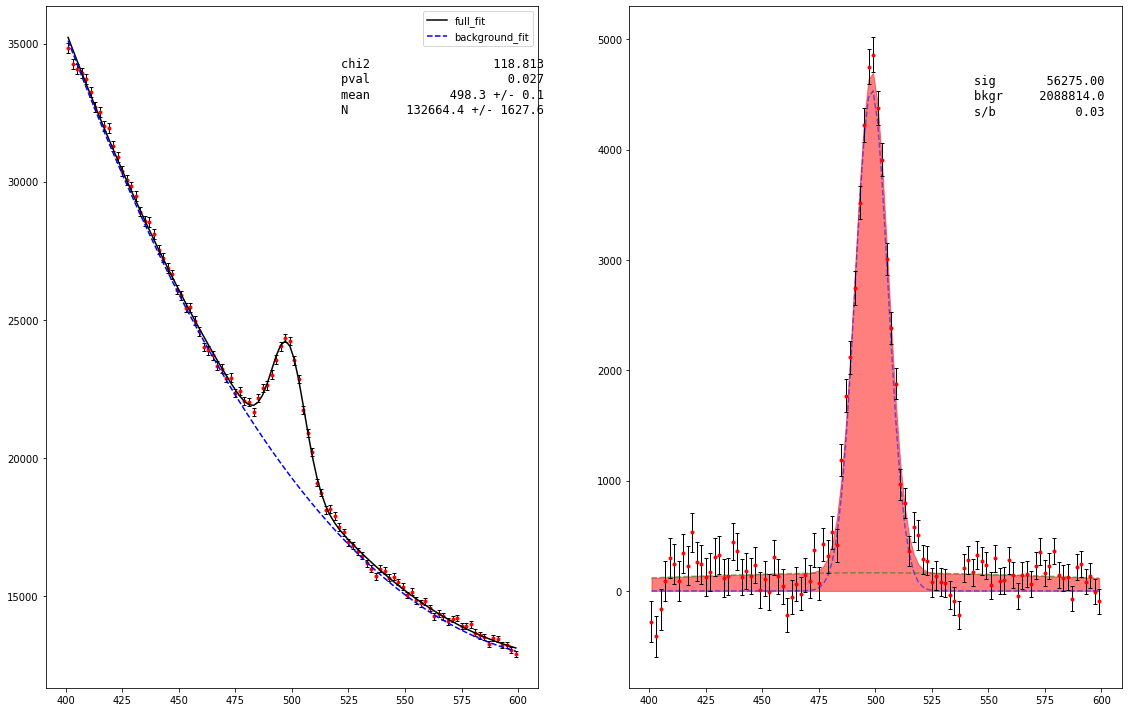

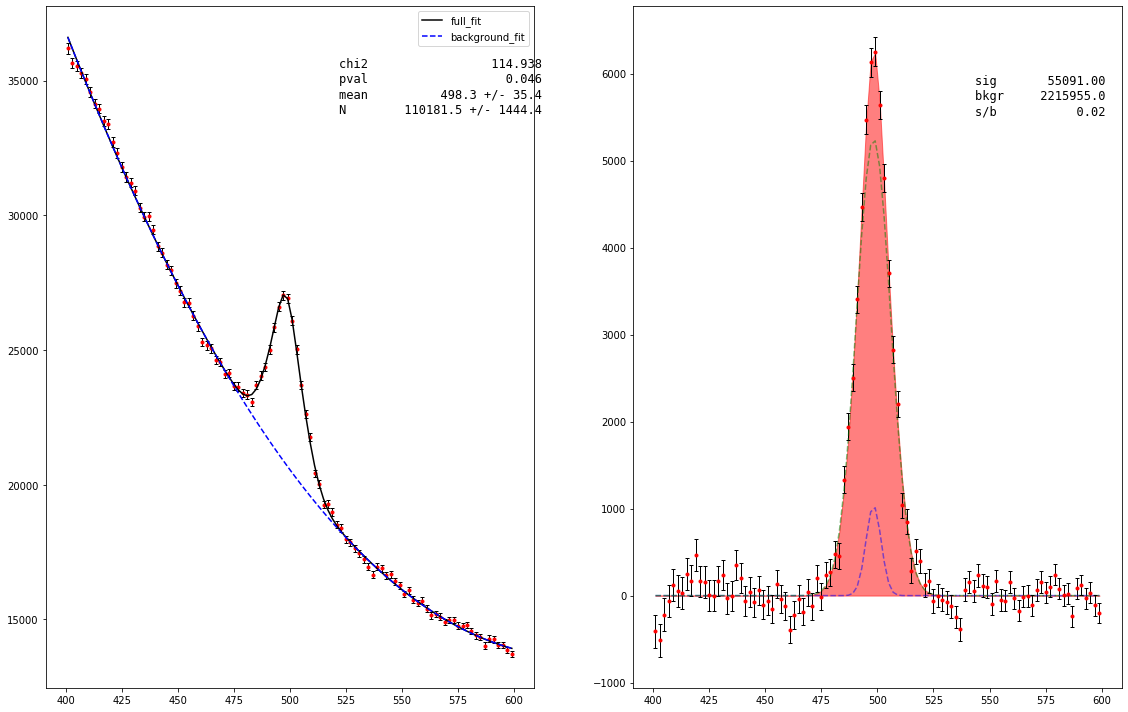

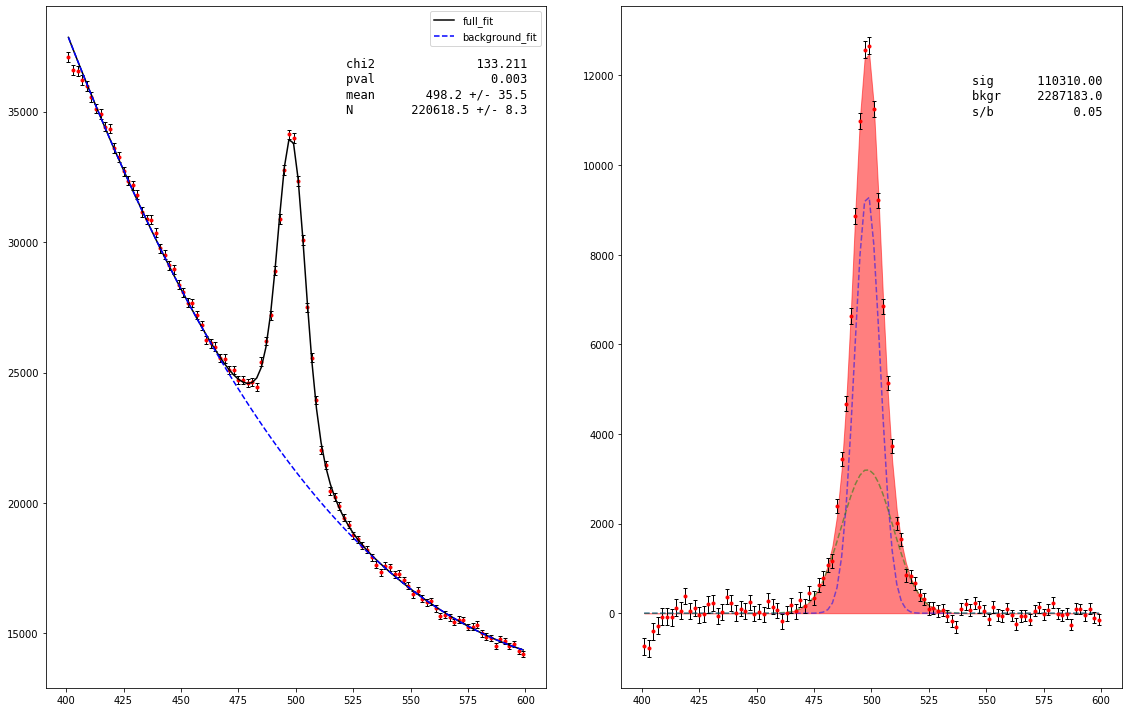

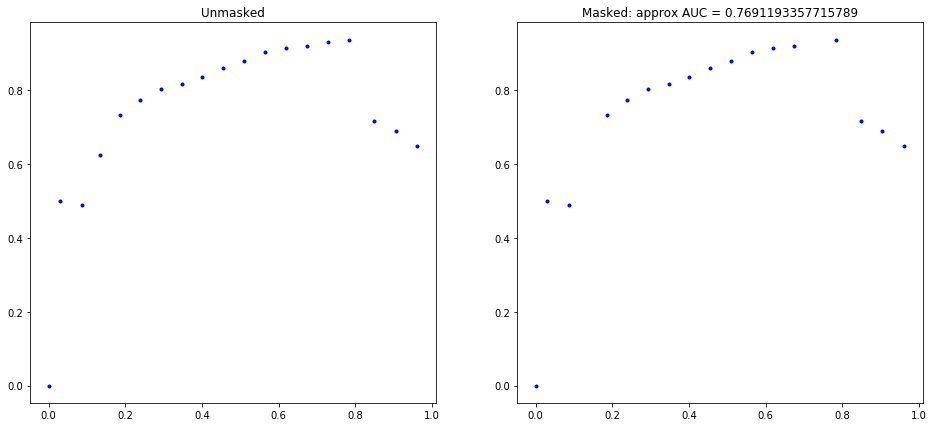

In [65]:
c = hm.ROC_data(data.v0_ks_mass,emb[:,0])

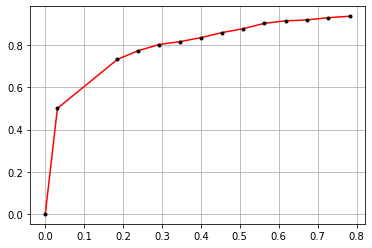

In [102]:
mask = [True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False][::-1]
s = c[2][mask]
b = c[3][mask]
fig, ax = plt.subplots()
ax.plot(1-b/b.max(),1 - s/s.max(),'r')
ax.plot(1-b/b.max(),1 - s/s.max(),'k.')
ax.grid()